In [5]:
# Importar bibliotecas
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
# Cargar los datos desde un archivo CSV
# Montamos la unidad donde se encuentra nuestro archivo de datos
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [7]:
# Leemos el archivo CSV
data = pd.read_csv("/content/drive/MyDrive/CDSMT/IntensidadesTiempoBase_Actualizado.csv", sep=",", encoding="latin1")

# Sin ser necesario, vamos a mostrar las primeras filas de los datos
print("Primeras filas del dataset:")
print(data.head())

Primeras filas del dataset:
    Año  Trimestre  PM                     Punto de Medida  IMDL  IMDS  IMDD  \
0  2020          1   1  Avda. Juan Sebastian Elcano - Este  5745  3777  3563   
1  2020          2   1  Avda. Juan Sebastian Elcano - Este  4750  3927  3441   
2  2019          1   1  Avda. Juan Sebastian Elcano - Este  4340  3642  3566   
3  2019          2   1  Avda. Juan Sebastian Elcano - Este  4902  4515  3092   
4  2018          1   1  Avda. Juan Sebastian Elcano - Este  5659  3204  3449   

   IMHPL  IMHPS  IMHPD  
0    452    374    355  
1    434    305    266  
2    385    379    320  
3    403    363    360  
4    307    325    288  


In [8]:
# Agrupación por punto de medida y métricas clave
traffic_by_pm = data.groupby("Punto de Medida")[["IMDL", "IMDS", "IMDD"]].sum()
print("Tráfico total por Punto de Medida:")
print(traffic_by_pm)

Tráfico total por Punto de Medida:
                                        IMDL    IMDS    IMDD
Punto de Medida                                             
Avda. Juan Sebastian Elcano - Este    333830  277584  226087
Avda. Juan Sebastian Elcano - Oeste  1077231  908261  758374
Bolivia - Este                        807150  693594  574010
P.M. Pablo Ruiz Picasso - Este        704478  545766  432580
P.M. Pablo Ruiz Picasso - Oeste       937400  790019  663497


In [9]:
# Vía con mayor tráfico en total
max_traffic = traffic_by_pm.idxmax()
print("\nPunto de Medida con mayor tráfico:")
print(f"Laborables: {max_traffic['IMDL']}")
print(f"Sábados: {max_traffic['IMDS']}")
print(f"Domingos: {max_traffic['IMDD']}")



Punto de Medida con mayor tráfico:
Laborables: Avda. Juan Sebastian Elcano - Oeste
Sábados: Avda. Juan Sebastian Elcano - Oeste
Domingos: Avda. Juan Sebastian Elcano - Oeste


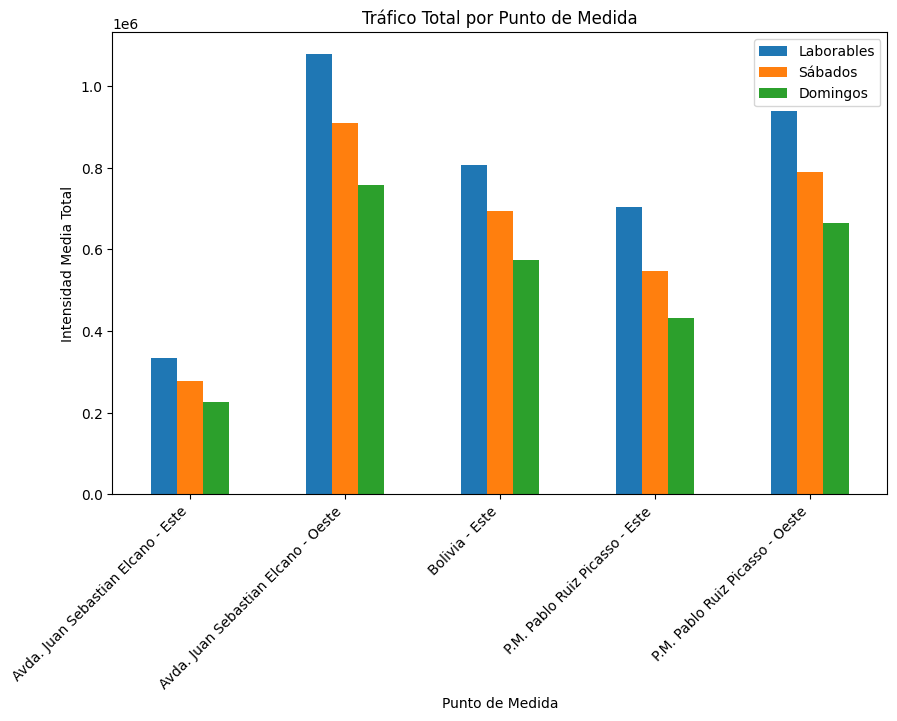

In [10]:
# Gráfico de barras para tráfico total por vía
traffic_by_pm.plot(kind="bar", figsize=(10, 6))
plt.title("Tráfico Total por Punto de Medida")
plt.ylabel("Intensidad Media Total")
plt.xticks(rotation=45, ha="right")
plt.legend(["Laborables", "Sábados", "Domingos"])
plt.show()

In [11]:
# Tráfico por trimestre
traffic_by_trimester = data.groupby(["Trimestre", "Punto de Medida"])[["IMDL", "IMDS", "IMDD"]].sum().reset_index()

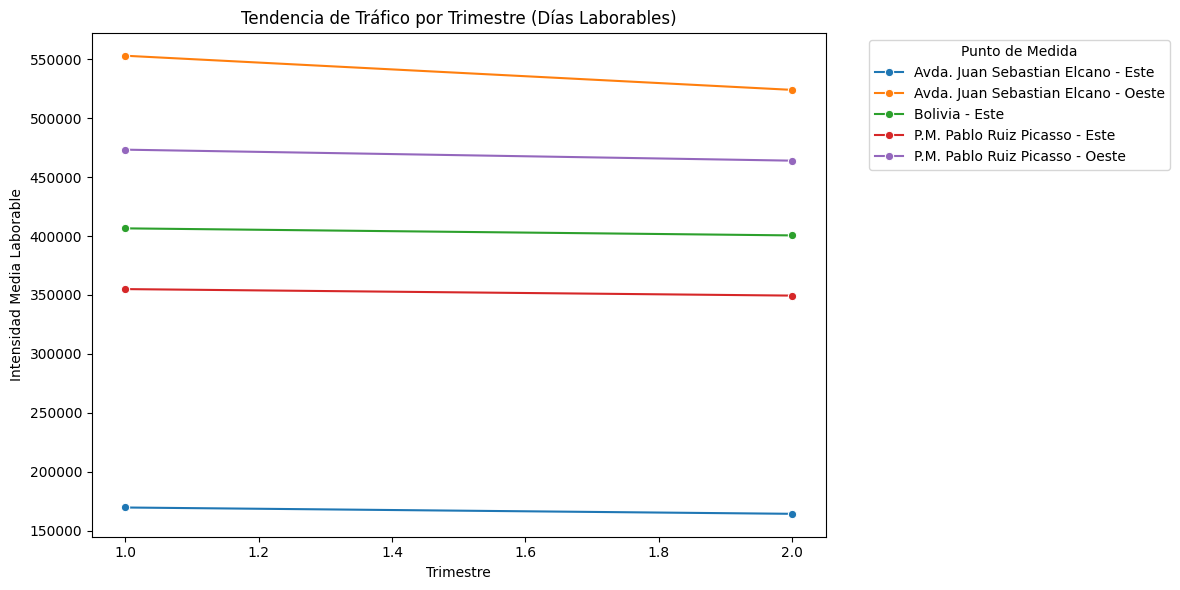

In [12]:
# Gráfico de líneas para tendencias trimestrales
plt.figure(figsize=(12, 6))
sns.lineplot(data=traffic_by_trimester, x="Trimestre", y="IMDL", hue="Punto de Medida", marker="o")
plt.title("Tendencia de Tráfico por Trimestre (Días Laborables)")
plt.ylabel("Intensidad Media Laborable")
plt.xlabel("Trimestre")
plt.legend(title="Punto de Medida", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()
